In [17]:
df.columns

Index(['similarity(prediction space)', 'Replacement', 'Replacement Name ',
       'Replacement use ', 'PFAS', 'PFAS Name', 'PFAS Use',
       'Viable Replacement? (patent)', 'Confirmed?'],
      dtype='object')

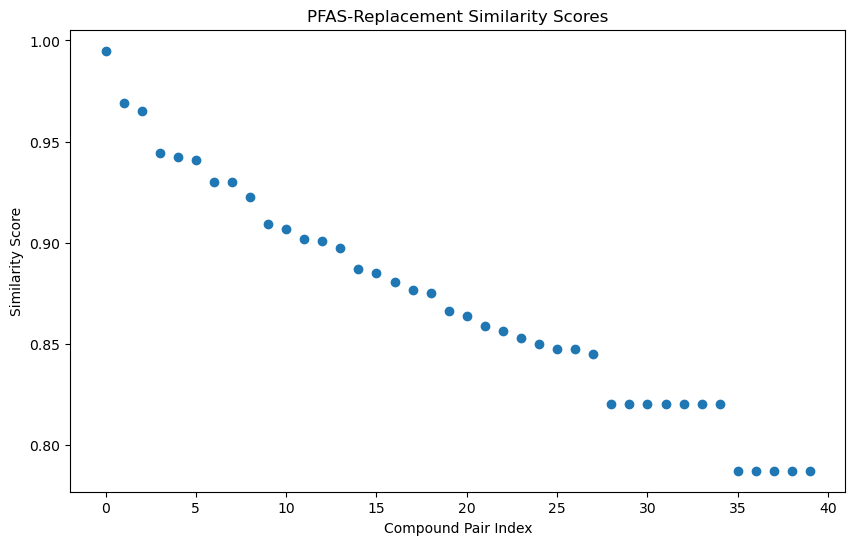

In [21]:
import io
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_chemicals(csv_path):
    df = pd.read_csv(csv_path)
    
    for idx, row in df.iterrows():
        pfas_mol = Chem.MolFromSmiles(row['PFAS'])
        replacement_mol = Chem.MolFromSmiles(row['Replacement'])
        
        if pfas_mol and replacement_mol:
            img = Draw.MolsToGridImage(
                [pfas_mol, replacement_mol],
                molsPerRow=2,
                subImgSize=(400, 400),
                legends=[
                    f"PFAS: {row['PFAS Name']}\nUse: {row['PFAS Use']}", 
                    f"Replacement: {row['Replacement Name ']}\nUse: {row['Replacement use ']}\nSimilarity: {row['similarity(prediction space)']:.2f}"
                ]
            )
            Draw.MolToFile(pfas_mol, f"pfas_{idx}.png")
            Draw.MolToFile(replacement_mol, f"replacement_{idx}.png")

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df)), df['similarity(prediction space)'])
    plt.xlabel("Compound Pair Index")
    plt.ylabel("Similarity Score")
    plt.title("PFAS-Replacement Similarity Scores")
    plt.savefig("similarity_plot.png")

visualize_chemicals("PFASMatrix - Sheet1.csv")

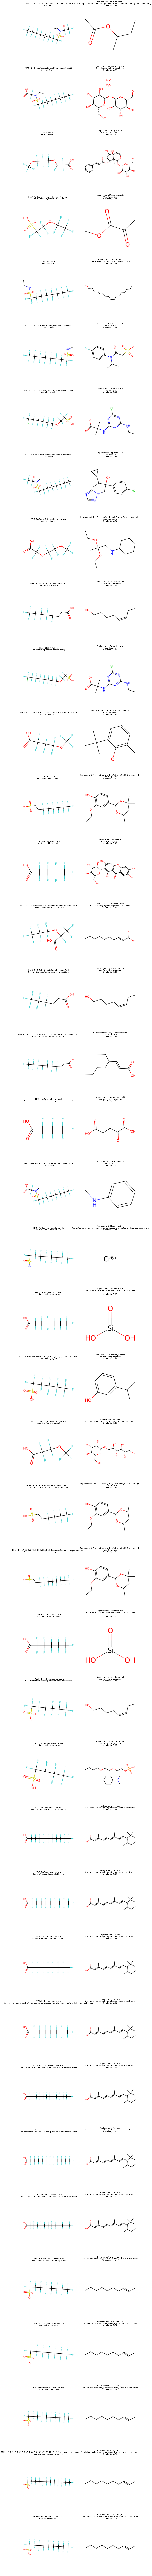

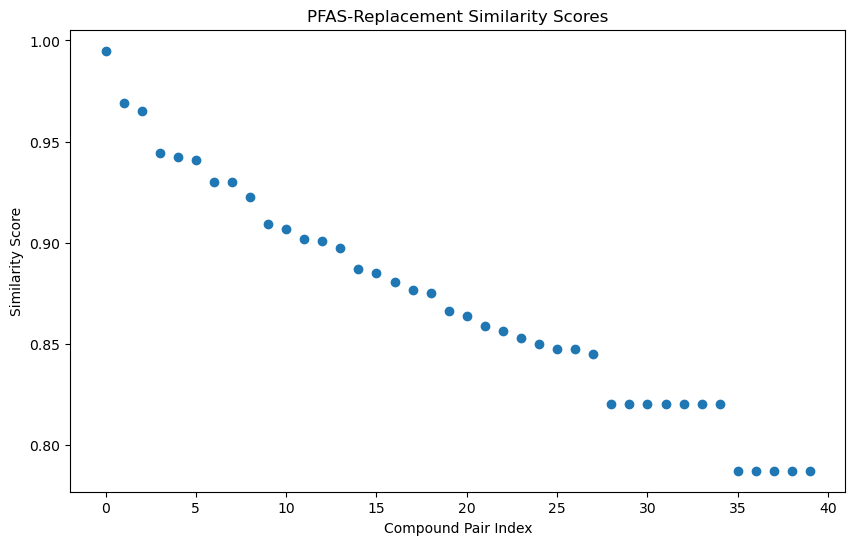

In [22]:
import io
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_chemicals(csv_path):
   df = pd.read_csv(csv_path)
   
   # Create subplot figure for chemical structures
   n_rows = len(df)
   fig, axes = plt.subplots(n_rows, 2, figsize=(12, 6*n_rows))
   
   for idx, row in df.iterrows():
       pfas_mol = Chem.MolFromSmiles(row['PFAS'])
       replacement_mol = Chem.MolFromSmiles(row['Replacement'])
       
       if pfas_mol and replacement_mol:
           # Draw PFAS
           img1 = Draw.MolToImage(pfas_mol)
           axes[idx,0].imshow(img1)
           axes[idx,0].set_title(f"PFAS: {row['PFAS Name']}\nUse: {row['PFAS Use']}")
           axes[idx,0].axis('off')
           
           # Draw Replacement
           img2 = Draw.MolToImage(replacement_mol)
           axes[idx,1].imshow(img2)
           axes[idx,1].set_title(f"Replacement: {row['Replacement Name ']}\nUse: {row['Replacement use ']}\nSimilarity: {row['similarity(prediction space)']:.2f}")
           axes[idx,1].axis('off')
   
   plt.tight_layout()
   plt.savefig("chemical_structures.png")
   
   # Similarity scatter plot
   plt.figure(figsize=(10, 6))
   plt.scatter(range(len(df)), df['similarity(prediction space)'])
   plt.xlabel("Compound Pair Index")
   plt.ylabel("Similarity Score") 
   plt.title("PFAS-Replacement Similarity Scores")
   plt.savefig("similarity_plot.png")

visualize_chemicals("PFASMatrix - Sheet1.csv")